<h1>20156025 Park Sungho</h1>

In [24]:
import PIL.Image as pilimg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import random

size_row = 100
size_col = 100

row = np.zeros((size_row,size_col),dtype = 'int')
col = np.zeros((size_row,size_col),dtype = 'int')
#데이터가 어디그룹인지 표시
group_num = np.zeros((size_row,size_col),dtype = 'int') 

for i in range(size_row):
    for j in range(size_col):
        row[i][j] = i
        col[i][j] = j
        
print(row)
print(col)

[[ 0  0  0 ...,  0  0  0]
 [ 1  1  1 ...,  1  1  1]
 [ 2  2  2 ...,  2  2  2]
 ..., 
 [97 97 97 ..., 97 97 97]
 [98 98 98 ..., 98 98 98]
 [99 99 99 ..., 99 99 99]]
[[ 0  1  2 ..., 97 98 99]
 [ 0  1  2 ..., 97 98 99]
 [ 0  1  2 ..., 97 98 99]
 ..., 
 [ 0  1  2 ..., 97 98 99]
 [ 0  1  2 ..., 97 98 99]
 [ 0  1  2 ..., 97 98 99]]


In [41]:
#norm 1
def norm1(x,y):
    d = np.abs(x - y)
    s = np.sum(d)
    return(s)

#norm 2
def norm2(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    r = np.sqrt(s)

    return(r)

In [36]:
#가장 작은 distance를 가지는 centeroid가 무엇인지 찾아주는 func
def min_dst(temp,k,x,y):
    group = 0
    min = temp[0]
    for i in range(k):
        if temp[i] < min:
            min = temp[i] #centeroid[i] 와의 distance가 가장 작다
            group = i
    group_num[x,y] = group  #즉 x번째 데이터는 i 그룹이다..
    return min

In [37]:
# plot Energy
def visualize():
    plt.title('??')
    #plt.plot(arr_label,'bo-')
    imshow(group_num, interpolation='nearest', cmap=plt.cm.bone_r)
    
    plt.legend() #범례
    plt.show()

In [38]:
def init(centeroid,k):
    for i in range(k):
        centeroid[i][0] = random.randrange(0,size_row)
        centeroid[i][1] = random.randrange(0,size_col)

In [47]:
def Kmeans(k,norm):
    temp = np.zeros(k,dtype = 'float')
    min_distance = np.zeros((size_row,size_col),dtype = 'float')
    
    centeroid = np.zeros((k,2),dtype = 'int')   #x,y k개 중심점
    pre_centeroid = np.zeros((k,2),dtype = 'int')
    
    iteration = 0
    energy = []
    
    #0. initalization
    init(centeroid,k)
    
    #print(centeroid)
    
    #3.이전 centeroid와 현재 centeroid가 같을때까지 반복
    while (not(np.array_equal(pre_centeroid, centeroid))):
        group_count = np.zeros(k,dtype = 'int')
        avg = np.zeros((k,2),dtype = 'int')
        
        pre_centeroid = centeroid
        
        #1. 각 픽셀과 centeroid를 비교 
        #2. => 가장 작은걸로 그룹
        for i in range(size_row):
            for j in range(size_col):
                for x in range(k):
                    position = np.array([row[i][j],col[i][j]])
                    #norm1 or norm2
                    if norm == 1:
                        temp[x] = norm1(position,centeroid[x,:])
                    else:
                        temp[x] = norm2(position,centeroid[x,:]) #픽셀과 centeroid의 distance
                min_distance[i,j] = min_dst(temp,k,i,j) #가장 짧은 거리를 구한다(여기서 그룹이 정해짐).
                group_count[group_num[i][j]]+=1 #각 그룹 갯수
                
        energy.append(np.sum(min_distance))
        
        # 각 그룹의 평균값 구하기
        # Sum
        for i in range(size_row):
            for j in range(size_col):
                avg[group_num[i][j],0] += row[i][0]
                avg[group_num[i][j],1] += col[0][j]
        # Divide
        for i in range(k):
            for j in range(2):
                if group_count[i] != 0:
                    avg[i,j] = avg[i,j] / group_count[i]
        centeroid = avg
        
        iteration +=1
        
        
    
    visualize()
    #print(centeroid)
    #plotEnergy(energy)
    #plotImage(centeroid)
    return iteration

<h1>1. Norm1 (k = 8,16,32)</h1>

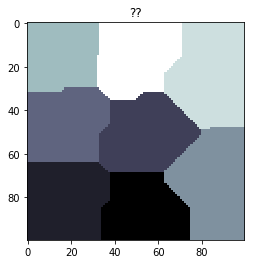

18

In [48]:
Kmeans(8,1)

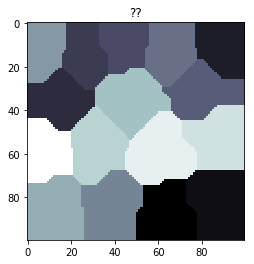

27

In [49]:
Kmeans(16,1)

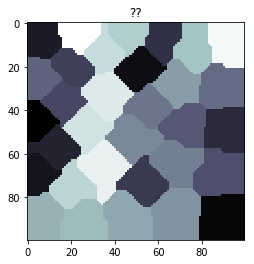

23

In [50]:
Kmeans(32,1)

<h1>2. Norm2 (k = 8,16,32)</h1>

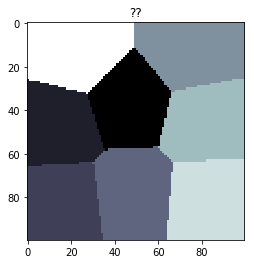

19

In [51]:
Kmeans(8,2)

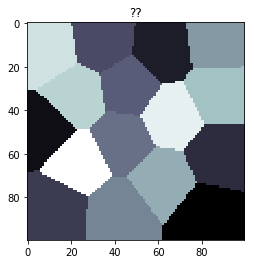

28

In [52]:
Kmeans(16,2)

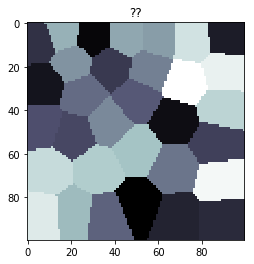

29

In [53]:
Kmeans(32,2)